In [1]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

from SketchVRNN import VRNN
from sketch_util import create_img, draw_sketches, mov_to_coord

In [2]:
vrnn = VRNN()
length_op, label_op, orig_sketch_op, (predicted_op, len_predicted_op) = vrnn.psample_after_half()

GPU Device in use: ''
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/sparse_ops.py:1165: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [3]:
out = vrnn.psample_after_half()

In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    vrnn.restore_latest(sess)
    
    length, label, orig_sketch, predicted, len_predicted = sess.run([length_op, label_op, orig_sketch_op, predicted_op, len_predicted_op])

INFO:tensorflow:Restoring parameters from ../checkpts/VRNNv9_hs2x512_anneal-lr_maxlen150_kldw1.0_trainTogether_annealKL-from0.4-end1.0-steps10000_cln-hidden+latent/checkpoint-77999


Restoring parameters from ../checkpts/VRNNv9_hs2x512_anneal-lr_maxlen150_kldw1.0_trainTogether_annealKL-from0.4-end1.0-steps10000_cln-hidden+latent/checkpoint-77999


Values were restored (scope: None)


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


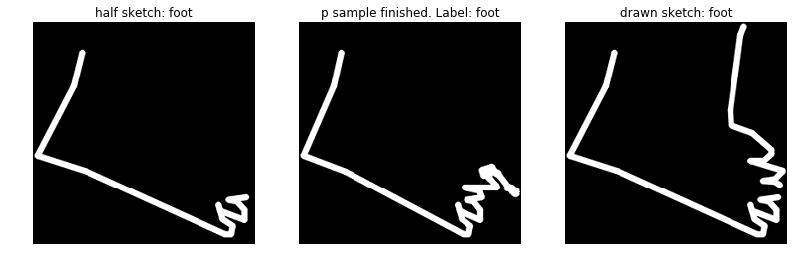

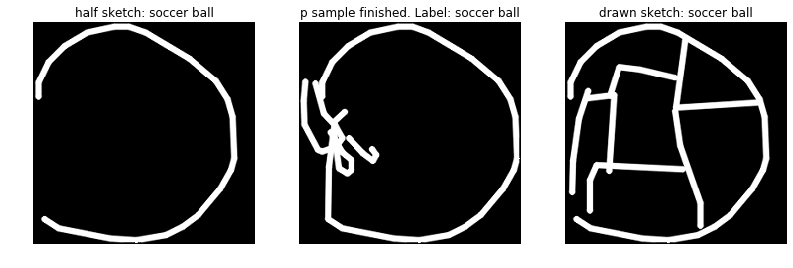

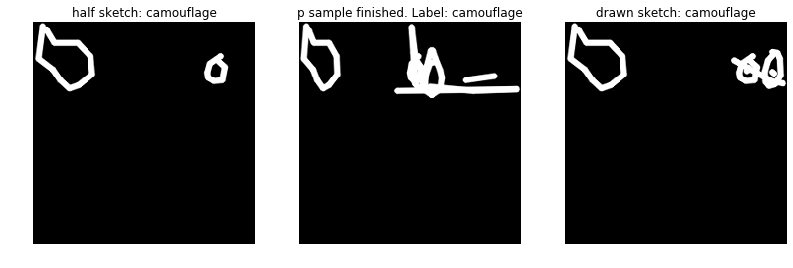

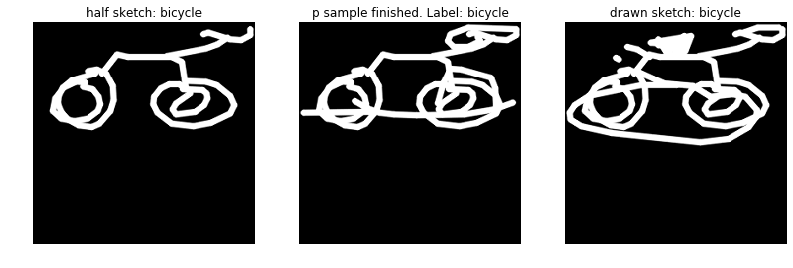

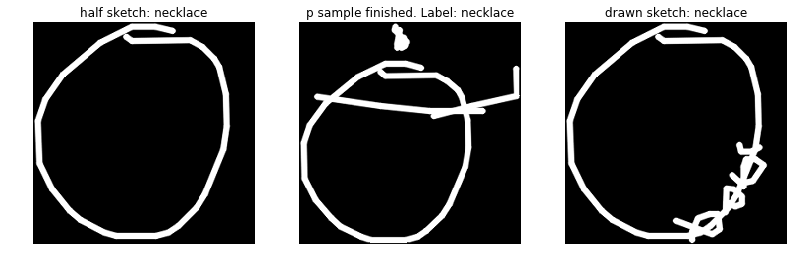

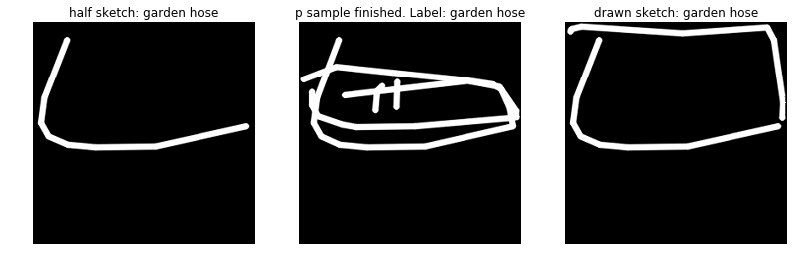

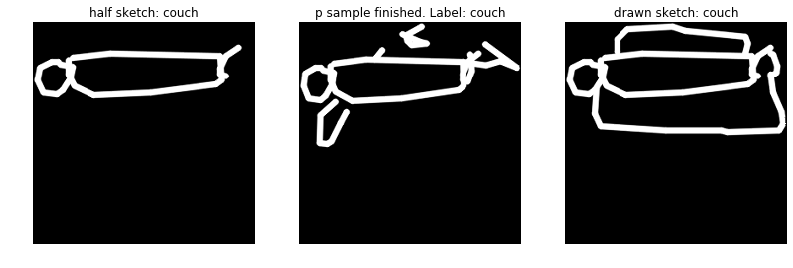

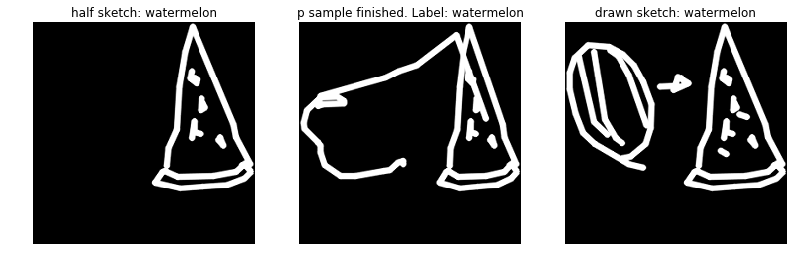

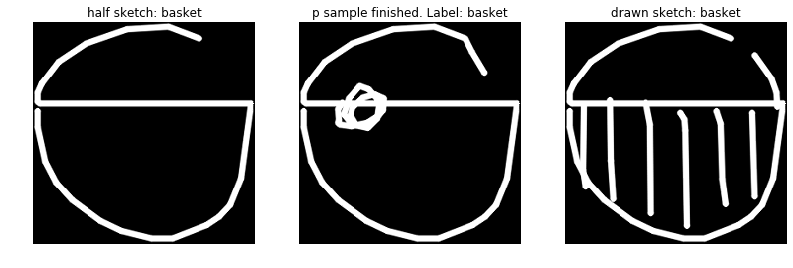

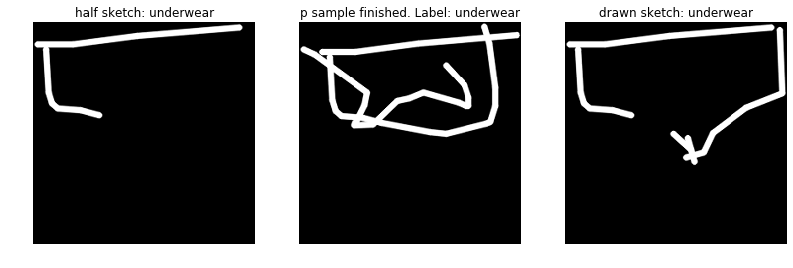

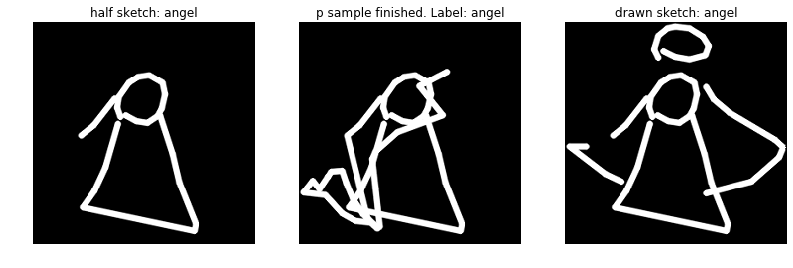

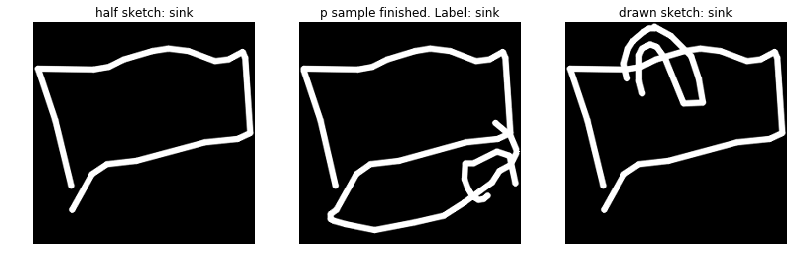

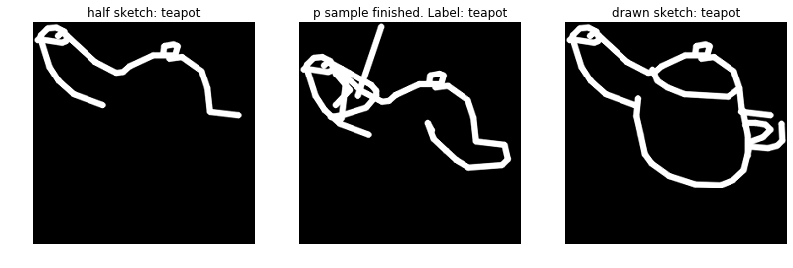

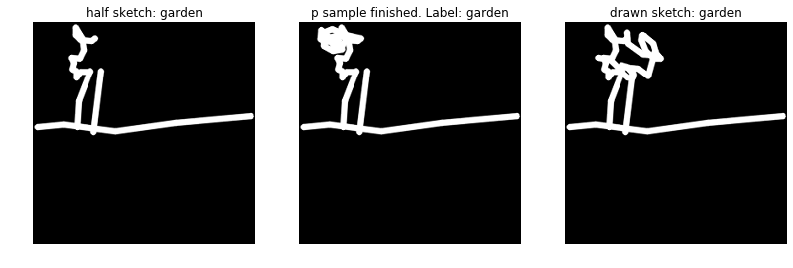

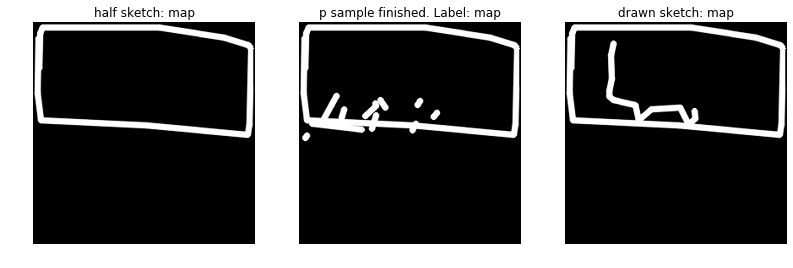

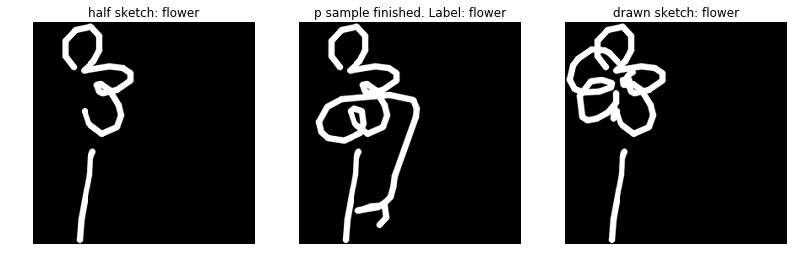

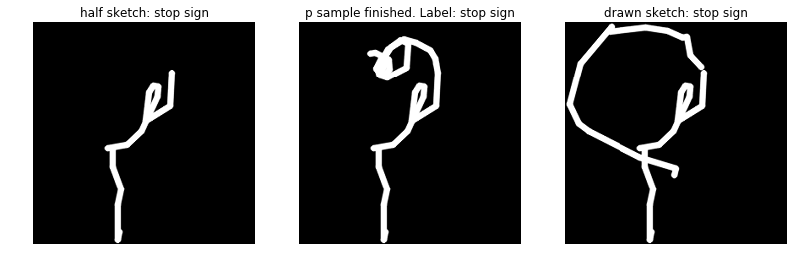

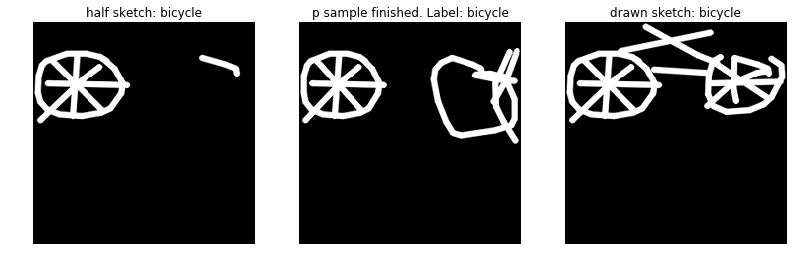

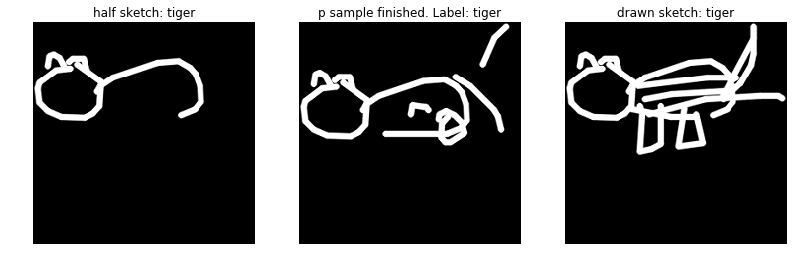

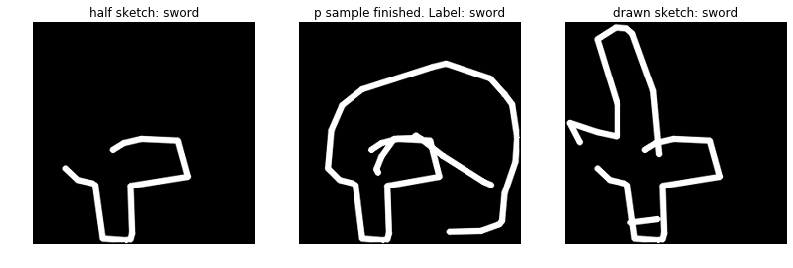

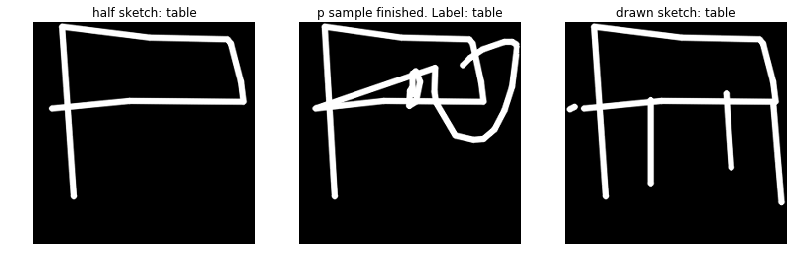

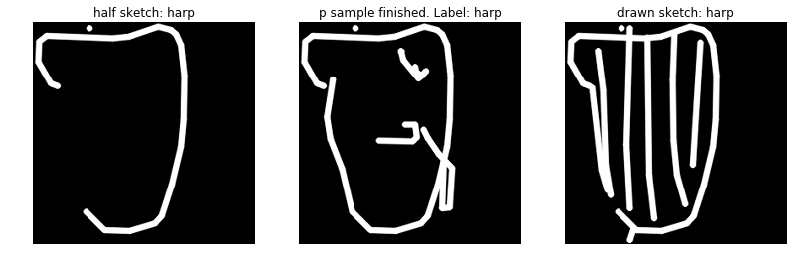

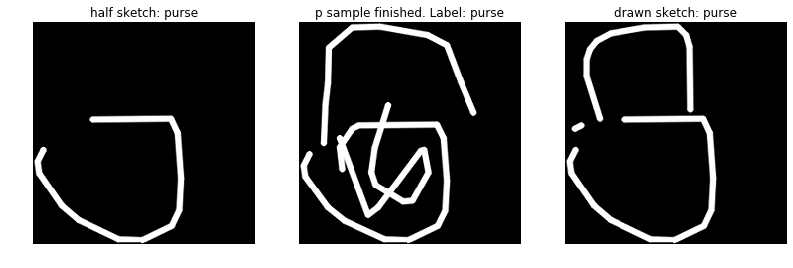

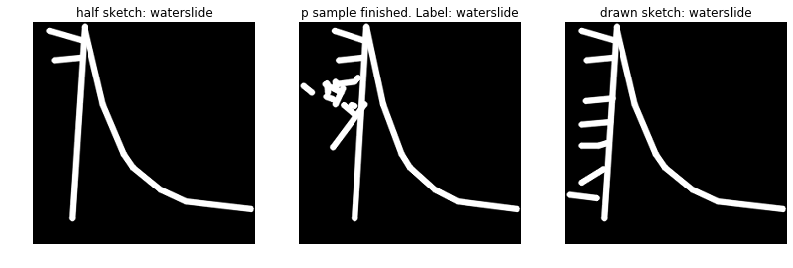

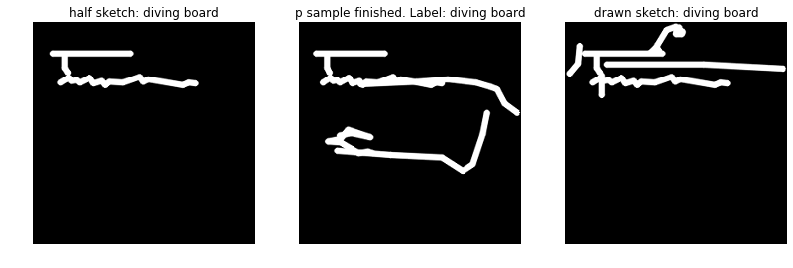

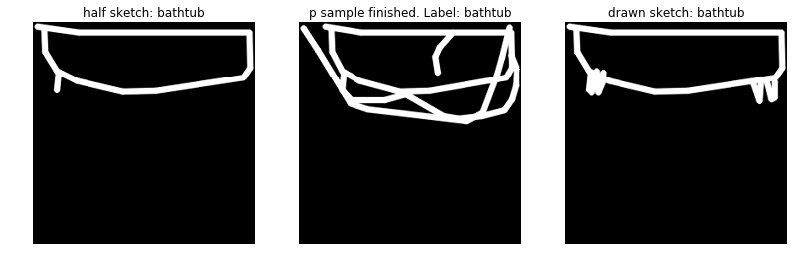

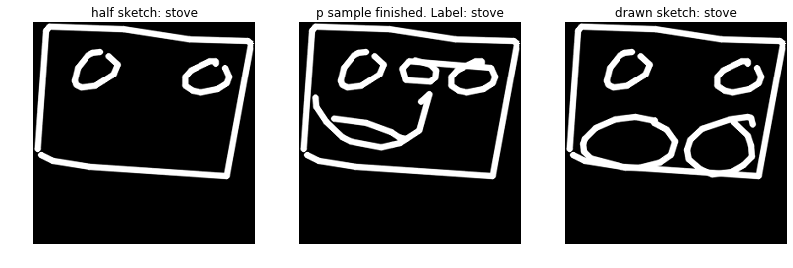

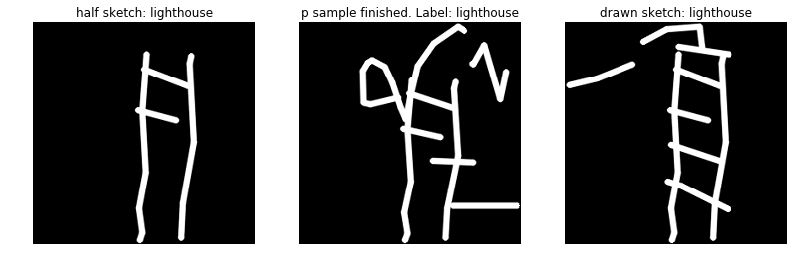

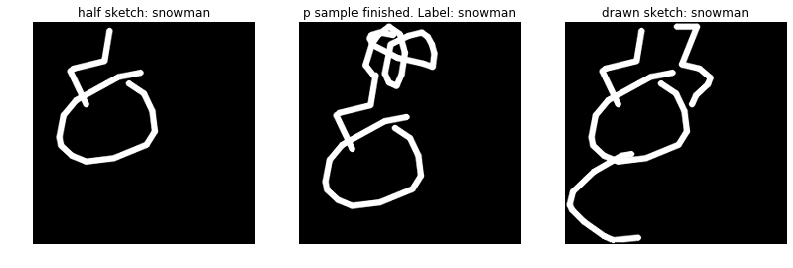

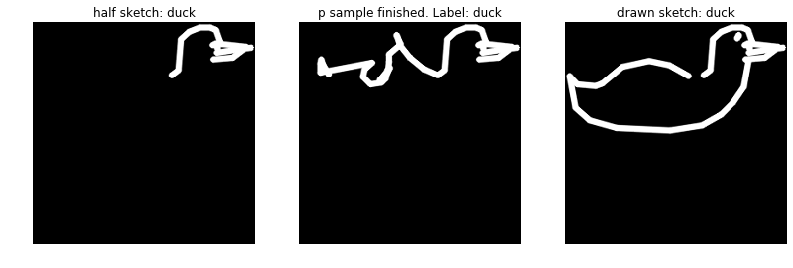

In [5]:
for (l,lbl,sk,lp,p) in zip(length, label, orig_sketch, len_predicted, predicted):
    # merge to get prediction
    half_l = (l+1)//2
    orig_part = sk[:half_l]
    last_pos = orig_part[-1, :2]
    p_half = p.copy()
    p_half = mov_to_coord(p, orig_coord=last_pos)

    p_concat = np.concatenate([orig_part, p_half], axis=0)

    draw_sketches([half_l + lp], [p_concat.copy()], [lbl], 
                   orig_sketches=[sk], orig_length=l, 
                   length_half=(l+1)//2,
                   plot_title="p sample finished")
